This project presents an exploratory data analysis of global agricultural trade data from 2014 to 2018.
Using Python and visualization tools such as Matplotlib and Seaborn, the analysis uncovers trends in global
import, export, production, and consumption of agricultural commodities. Key insights include identification
of top exporting and importing countries, the most traded commodities, and correlations between production and export volumes.

This notebook demonstrates my ability to clean, analyze, and interpret large datasets, and extract actionable business insights
which are crucial for roles in data analytics and data science.

In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

In [3]:
# 2. Load Dataset
df = pd.read_csv("Export.csv")

In [4]:
# 3. Initial Data Exploration
print(df.shape)
print(df.columns)
print(df.head())

(45321, 13)
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Item Code (CPC)', 'Item', 'Year', 'Unit', 'Import', 'Export ',
       'Production', 'Consumption'],
      dtype='object')
  Domain Code                        Domain  Area Code (M49)         Area  \
0         TCL  Crops and livestock products                4  Afghanistan   
1         TCL  Crops and livestock products                4  Afghanistan   
2         TCL  Crops and livestock products                4  Afghanistan   
3         TCL  Crops and livestock products                4  Afghanistan   
4         TCL  Crops and livestock products                4  Afghanistan   

   Element Code  Item Code (CPC)  \
0          5610             1654   
1          5610             1654   
2          5610             1654   
3          5610             1654   
4          5610             1654   

                                                Item  Year Unit   Import  \
0  Anise, badian, coriander

In [6]:
# 4. Data Cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.dropna(subset=['consumption', 'year'])
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [7]:
# 5. Market Analysis – Spice Consumption Trends
if 'element_code' in df.columns and 'area' in df.columns:
    available_elements = df['element_code'].unique()
    print("Available element codes:", available_elements)

    consumption_df = df[df['element_code'] == 5610]
    if not consumption_df.empty and 'consumption' in consumption_df.columns:
        consumption_by_country = consumption_df.groupby(['area', 'year'])['consumption'].sum().reset_index()
        fig = px.line(consumption_by_country, x='year', y='consumption', color='area',
                      title='Spice Consumption Trends by Country')
        fig.show()
    else:
        print("No data found for element_code 5610 or 'consumption' column is missing.")
else:
    print("Column 'element_code' or 'area' not found in the dataset.")

Available element codes: [5610]


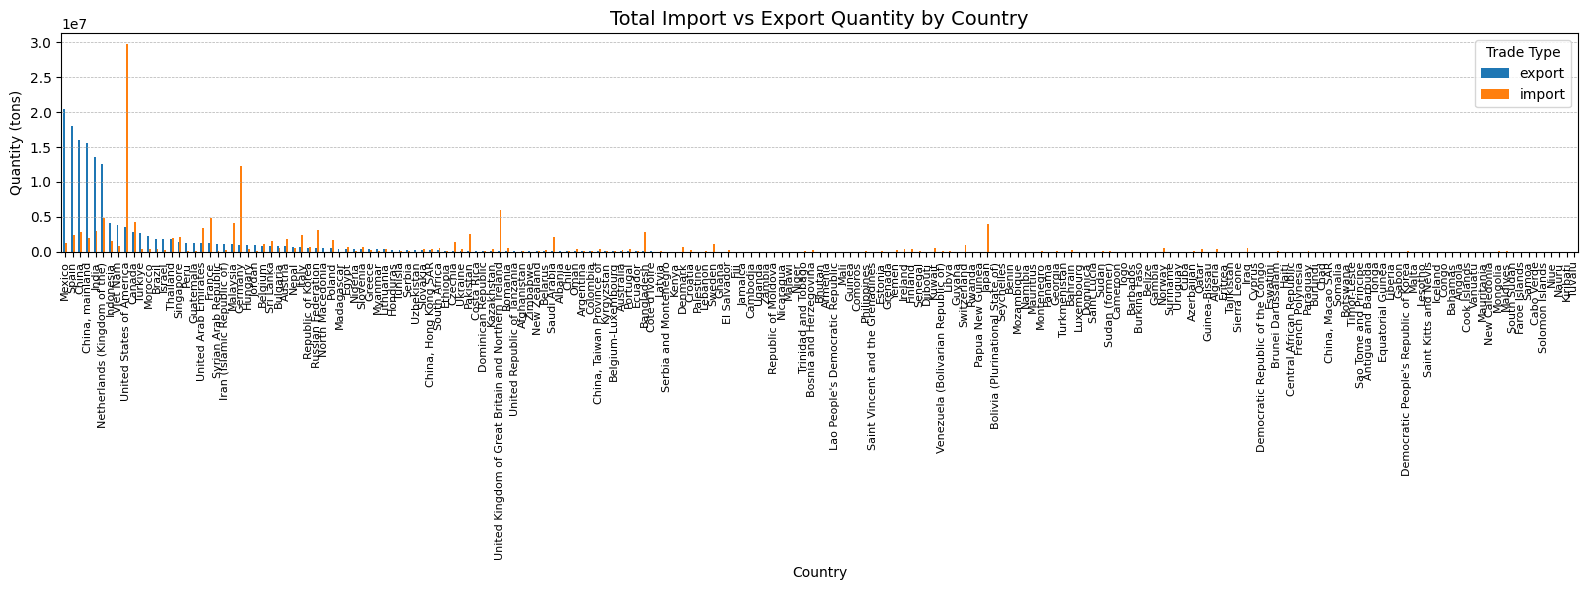

In [8]:
# 6. Trade & Economics – Import-Export Dynamics
if {'export', 'import', 'area'}.issubset(df.columns):
    trade_summary = df.groupby('area')[['export', 'import']].sum().sort_values(by='export', ascending=False)

    ax = trade_summary.plot(kind='bar', stacked=False, figsize=(16, 6), color=['#1f77b4', '#ff7f0e'])
    plt.title('Total Import vs Export Quantity by Country', fontsize=14)
    plt.ylabel('Quantity (tons)')
    plt.xlabel('Country')
    plt.xticks(rotation=90, fontsize=8)
    plt.legend(title='Trade Type')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('export', 'import', 'area') are missing from the dataset.")

Unique element codes: [5610]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/

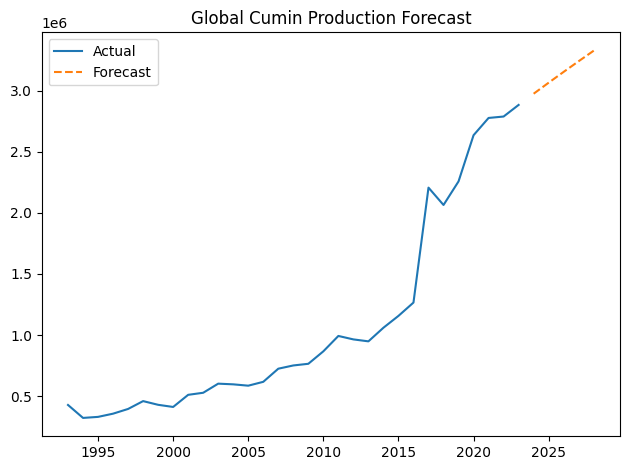

In [9]:
# 7. Forecasting – Example with ARIMA (e.g., global cumin production)
# Check for required columns first
if {'item', 'element_code', 'production', 'year'}.issubset(df.columns):
    print("Unique element codes:", df['element_code'].unique())

    # Use correct numeric code for 'Production'
    production_code = 5610  # Based on dataset info
    cumin_df = df[(df['item'].str.contains("cumin", case=False)) & (df['element_code'] == production_code)]

    if not cumin_df.empty:
        cumin_global = cumin_df.groupby('year')['production'].sum()

        if len(cumin_global) > 10:
            try:
                model = ARIMA(cumin_global, order=(1, 1, 1))
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=5)

                plt.plot(cumin_global, label='Actual')
                plt.plot(range(cumin_global.index.max()+1, cumin_global.index.max()+6), forecast, label='Forecast', linestyle='--')
                plt.title('Global Cumin Production Forecast')
                plt.legend()
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print("ARIMA model fitting error:", e)
        else:
            print("Not enough data points for ARIMA model. At least 10 years of data recommended.")
    else:
        print("No data found for cumin production using element_code =", production_code)
else:
    print("Missing required columns: 'item', 'element_code', 'production', or 'year'")

Top 10 Exporting Countries:
                                    export       import
area                                                  
Mexico                        20435119.43   1286963.02
Spain                         18059759.63   2406685.76
China                         16050728.41   2802104.68
China, mainland               15591500.48   2021021.69
India                         13561481.59   2939118.85
Netherlands (Kingdom of the)  12609004.08   4869270.77
Indonesia                      4095373.18   1513265.65
Viet Nam                       3775880.23    795046.83
United States of America       3613161.68  29791513.00
Canada                         2834218.43   4210866.95

Top 10 Importing Countries:
                                                          export       import
area                                                                        
United States of America                             3613161.68  29791513.00
Germany                                           

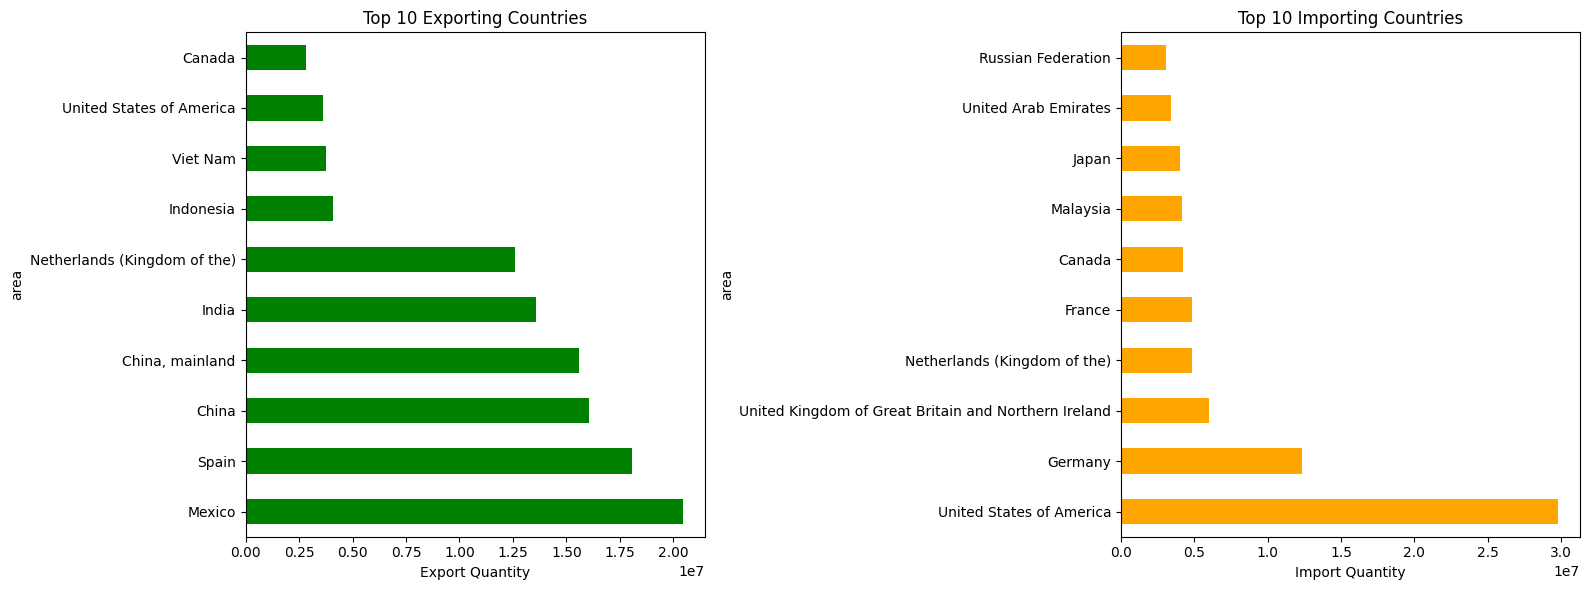

In [10]:
# 8. Top Exporters and Importers
top_trade_summary = df.groupby(['area'])[['export', 'import']].sum().fillna(0)
top_exporters = top_trade_summary.sort_values(by='export', ascending=False).head(10)
top_importers = top_trade_summary.sort_values(by='import', ascending=False).head(10)
print("Top 10 Exporting Countries:\n", top_exporters)
print("\nTop 10 Importing Countries:\n", top_importers)

# Visualization for Top Exporters and Importers
fig, axes = plt.subplots(1, 2, figsize=(16,6))
top_exporters['export'].plot(kind='barh', ax=axes[0], color='green')
top_importers['import'].plot(kind='barh', ax=axes[1], color='orange')
axes[0].set_title('Top 10 Exporting Countries')
axes[1].set_title('Top 10 Importing Countries')
axes[0].set_xlabel('Export Quantity')
axes[1].set_xlabel('Import Quantity')
plt.tight_layout()
plt.show()

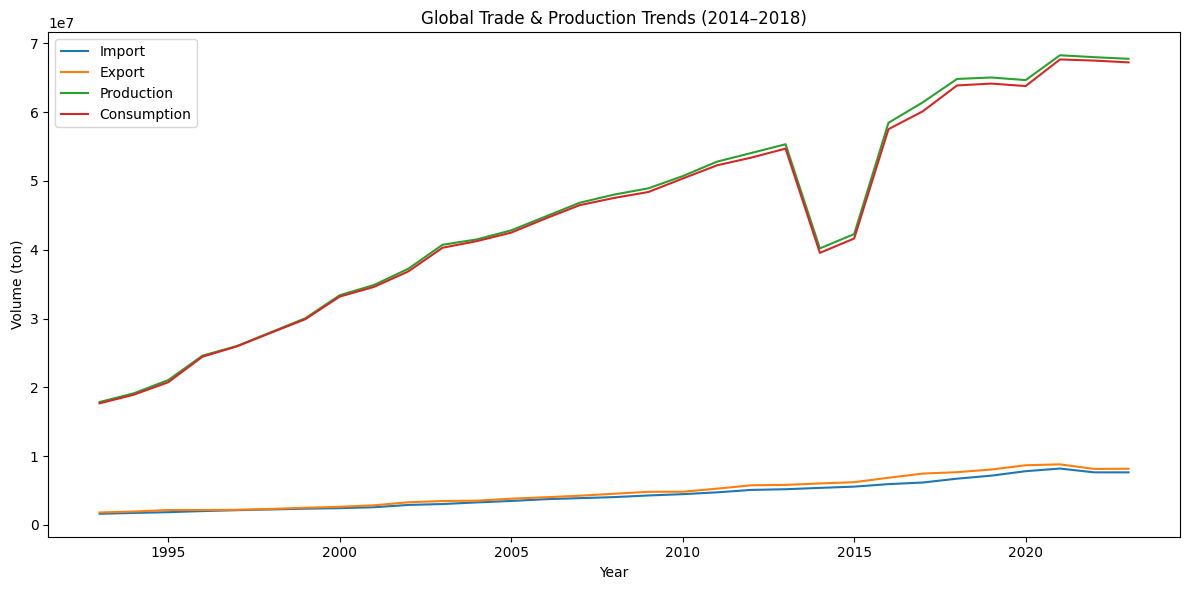

In [11]:
# --- Total export/import/production per year ---
yearly_summary = df.groupby("year")[["import", "export", "production", "consumption"]].sum().reset_index()

plt.figure(figsize=(12, 6))
for col in ["import", "export", "production", "consumption"]:
    sns.lineplot(data=yearly_summary, x="year", y=col, label=col.title())
plt.title("Global Trade & Production Trends (2014–2018)")
plt.ylabel("Volume (ton)")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-12-057828e19e2c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




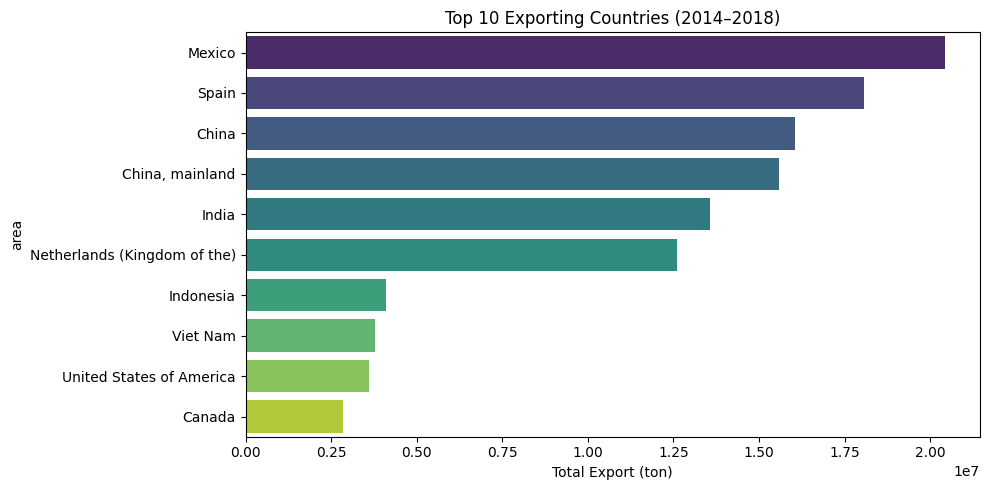

In [12]:
# --- Top 10 exporting countries ---
top_exporting = df.groupby("area")["export"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_exporting.values, y=top_exporting.index, palette="viridis")
plt.title("Top 10 Exporting Countries (2014–2018)")
plt.xlabel("Total Export (ton)")
plt.tight_layout()
plt.show()

<ipython-input-13-ab0231fc22ac>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




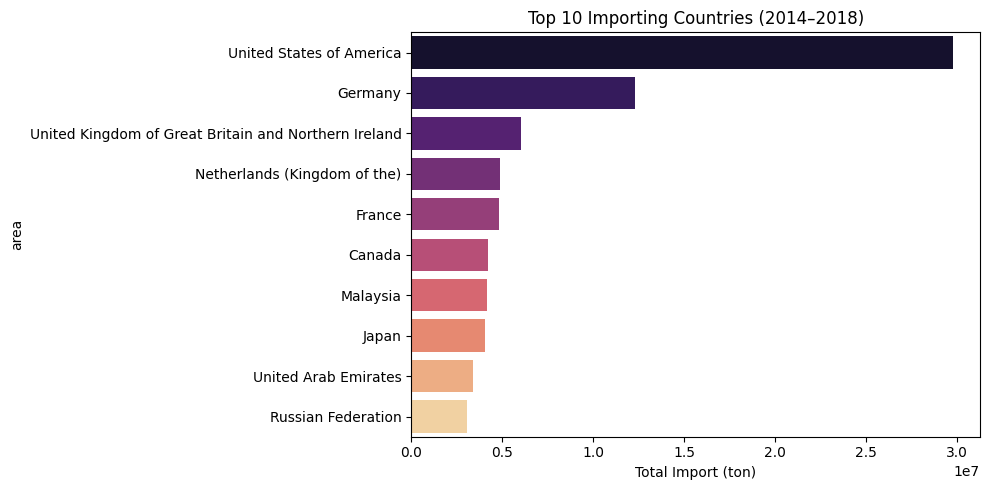

In [13]:
# --- Top 10 importing countries ---
top_importing = df.groupby("area")["import"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_importing.values, y=top_importing.index, palette="magma")
plt.title("Top 10 Importing Countries (2014–2018)")
plt.xlabel("Total Import (ton)")
plt.tight_layout()
plt.show()

<ipython-input-14-02a570cc7857>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




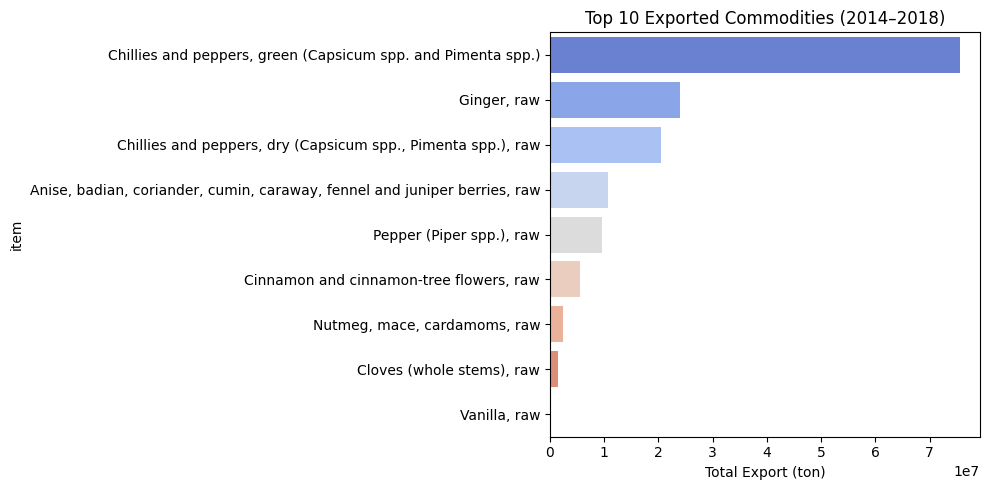

In [14]:
# --- Top 10 exported items ---
top_items = df.groupby("item")["export"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_items.values, y=top_items.index, palette="coolwarm")
plt.title("Top 10 Exported Commodities (2014–2018)")
plt.xlabel("Total Export (ton)")
plt.tight_layout()
plt.show()

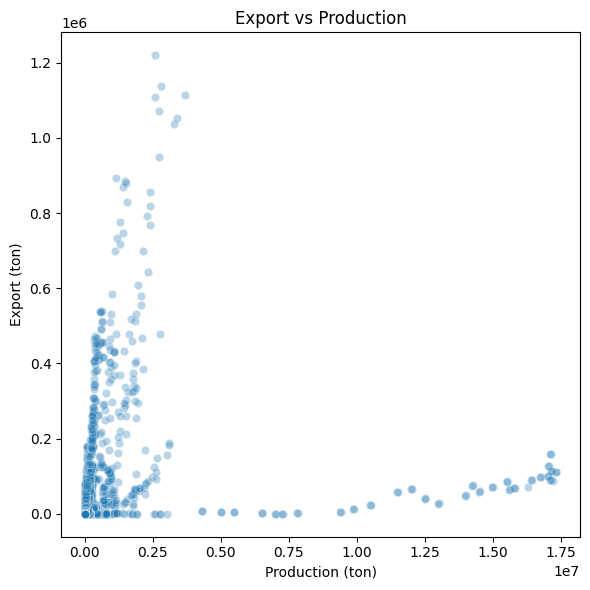


Correlation between Production and Export: 0.22


In [16]:
# --- Export vs Production Correlation ---
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="production", y="export", alpha=0.3)
plt.title("Export vs Production")
plt.xlabel("Production (ton)")
plt.ylabel("Export (ton)")
plt.tight_layout()
plt.show()

correlation = df[["production", "export"]].corr().iloc[0, 1]
print(f"\nCorrelation between Production and Export: {correlation:.2f}")